In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
air_data  = pd.read_csv("AQXDaily_20170409211519.csv")

目標 : 使用下列方法觀察資料  

* t-test   
* anova



PSI (污染物標準指標) 為當日(SO2   CO   O3   PM10)中最大值作為PSI

In [35]:
air_data.columns

Index(['SiteId', 'SiteName', 'MonitorDate', 'PSI', 'SO2SubIndex', 'COSubIndex',
       'O3SubIndex', 'PM10SubIndex', 'NO2SubIndex'],
      dtype='object')

In [3]:
air_data .shape

(1000, 9)

In [4]:
air_data[air_data['PM10SubIndex'].isnull()].shape    #PM10SubIndex 的notnull

(12, 9)

In [5]:
air_data[air_data['SO2SubIndex'].isnull()].shape     #SO2SubIndex 的notnull

(9, 9)

In [6]:
air_data[air_data['COSubIndex'].isnull()].shape      #COSubIndex 的notnull

(80, 9)

In [7]:
air_data[air_data['O3SubIndex'].isnull()].shape

(148, 9)

In [8]:
air_data.MonitorDate.unique()

array(['2017-04-08', '2017-04-07', '2017-04-06', '2017-04-05',
       '2017-04-04', '2017-04-03', '2017-04-02', '2017-04-01',
       '2017-03-31', '2017-03-30', '2017-03-29', '2017-03-28',
       '2017-03-27', '2017-03-26'], dtype=object)

In [10]:
air_data.SiteName.unique()

array(['麥寮', '關山', '馬公', '金門', '馬祖', '埔里', '復興', '永和', '竹山', '中壢', '三重',
       '冬山', '宜蘭', '陽明', '花蓮', '臺東', '恆春', '潮州', '屏東', '小港', '前鎮', '前金',
       '左營', '楠梓', '林園', '大寮', '鳳山', '仁武', '橋頭', '美濃', '臺南', '安南', '善化',
       '新營', '嘉義', '臺西', '朴子', '新港', '崙背', '斗六', '南投', '二林', '線西', '彰化',
       '西屯', '忠明', '大里', '沙鹿', '豐原', '三義', '苗栗', '頭份', '新竹', '竹東', '湖口',
       '龍潭', '平鎮', '觀音', '大園', '桃園', '大同', '松山', '古亭', '萬華', '中山', '士林',
       '淡水', '林口', '菜寮', '新莊', '板橋', '土城', '新店', '萬里', '汐止', '基隆'], dtype=object)

## 此空氣資料中，共有12天,  及76個地點

In [9]:
air_data

,SiteId,SiteName,MonitorDate,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,NO2SubIndex
0,83,麥寮,2017-04-08,52,4.0,NaN,NaN,52.0,NaN
1,80,關山,2017-04-08,25,2.0,NaN,25.0,23.0,NaN
2,78,馬公,2017-04-08,27,1.0,2.0,24.0,27.0,NaN
3,77,金門,2017-04-08,24,3.0,2.0,24.0,23.0,NaN
4,75,馬祖,2017-04-08,39,5.0,5.0,37.0,39.0,NaN
5,72,埔里,2017-04-08,61,2.0,3.0,61.0,45.0,NaN
6,71,復興,2017-04-08,37,14.0,8.0,NaN,37.0,NaN
7,70,永和,2017-04-08,55,4.0,18.0,NaN,55.0,NaN
8,69,竹山,2017-04-08,62,4.0,3.0,62.0,52.0,NaN
9,68,中壢,2017-04-08,58,6.0,17.0,NaN,58.0,NaN


* ## 檢測同汙染物，多個地點，一段時間序列資料

* ## 檢測單一個地點，不同汙染物，一段時間序列資料

In [10]:
a = air_data[(air_data['SO2SubIndex'].notnull())&(air_data['PM10SubIndex'].notnull())]['PM10SubIndex']
v = air_data[(air_data['SO2SubIndex'].notnull())&(air_data['PM10SubIndex'].notnull())]['SO2SubIndex']

In [11]:
air_data.MonitorDate.unique()

array(['2017-04-08', '2017-04-07', '2017-04-06', '2017-04-05',
       '2017-04-04', '2017-04-03', '2017-04-02', '2017-04-01',
       '2017-03-31', '2017-03-30', '2017-03-29', '2017-03-28',
       '2017-03-27', '2017-03-26'], dtype=object)

## Using SciPy

## 方差分析

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [12]:
NOnull_data = air_data[(air_data['PM10SubIndex'].notnull())&(air_data['SO2SubIndex'].notnull())&(air_data['COSubIndex'].notnull())&(air_data['O3SubIndex'].notnull())]

## 分析嘉義 PM10SubIndex,SO2SubIndex 和 COSubIndex 三個汙染物時間序列資料之間的關係

In [49]:
# ANOVA
import scipy.stats as stats
PM10_SO2_COS_data = air_data[(air_data['PM10SubIndex'].notnull())&(air_data['SO2SubIndex'].notnull())&(air_data['COSubIndex'].notnull())]

PM10_SO2_COS_data['PM10SubIndex']
PM10_SO2_COS_data['SO2SubIndex']
PM10_SO2_COS_data['COSubIndex']
f_val, p_val = stats.f_oneway(NOnull_data[NOnull_data['SiteName']=='恆春']['PM10SubIndex'], NOnull_data[NOnull_data['SiteName']=='恆春']['SO2SubIndex'], NOnull_data[NOnull_data['SiteName']=='恆春']['COSubIndex'])
print('f-test: ',f_val,'   p_value: ', p_val )

f-test:  234.925797189    p_value:  2.19295033827e-21


F-值愈大，p-值愈小，差異愈顯著

 F - 值 = (組間變異)/(組內變異)
 
 用來檢定兩個統計量是否估計相等的變異數。大的F值表示分子的統計量可能估計較大的變異數。

F-檢定亦稱為變異數比例檢定。

# T-test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

* ## 單一個地點，不同汙染物，一段時間序列資料

In [17]:
from scipy.stats import ttest_ind

In [18]:
pollutions = ['PM10SubIndex','O3SubIndex','COSubIndex','SO2SubIndex']

###  目標：
### 檢定嘉義 'O3SubIndex' 和 'COSubIndex' 兩個汙染物時間序列資料之間的關係

In [48]:
ttest_ind(NOnull_data[NOnull_data['SiteName']=='嘉義'][pollutions[1]],NOnull_data[NOnull_data['SiteName']=='嘉義'][pollutions[2]])

Ttest_indResult(statistic=20.295931177699853, pvalue=1.2830279199848577e-16)

### 結果

### 嘉義 'O3SubIndex' 和 'COSubIndex' 兩個汙染物的關連性極高

In [38]:
NOnull_data[NOnull_data['SiteName']=='嘉義'][pollutions[1]]

34     48.0
110    62.0
186    76.0
262    68.0
338    66.0
414    83.0
490    77.0
566    67.0
642    45.0
718    68.0
794    66.0
870    62.0
946    66.0
Name: O3SubIndex, dtype: float64

### 目標 : 
### 查看 (  淡水 新竹 南投 二林 嘉義 左營) 這6個地點中，4個空氣汙染物之間的關聯性

In [27]:
import seaborn as sns
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

def singleplace(site):
    
    pollutions = ['PM10SubIndex','O3SubIndex','COSubIndex','SO2SubIndex']
    pollution = ['PM10','O3','CO','SO2']
    cor = np.zeros([4,4])

    for i in (0,1,2,3):
        for j in (0,1,2,3):
            if (i!=j):
                val = ttest_ind(NOnull_data[NOnull_data['SiteName']==site][pollutions[i]],NOnull_data[NOnull_data['SiteName']==site][pollutions[j]])
                cor[i,j] = val.pvalue
                #print(pollutions[i],'&',pollutions[j],'',val.pvalue)
                #print(val)

    
    fig, ax = plt.subplots()


    ax = sns.heatmap(cor)
    pollution.reverse()
    ax.set_yticklabels(pollution) # set the labels
    pollution.reverse()
    ax.set_xticklabels(pollution)
    ax.set_title(site,size=20)


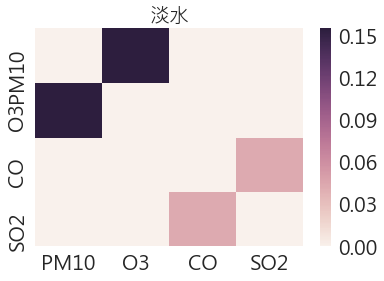

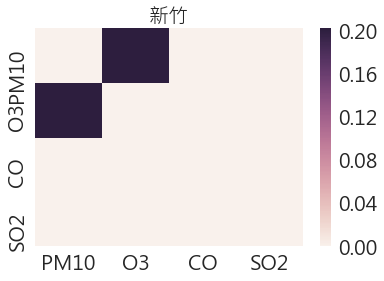

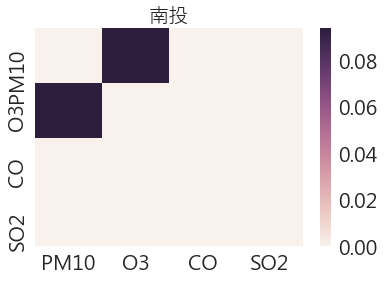

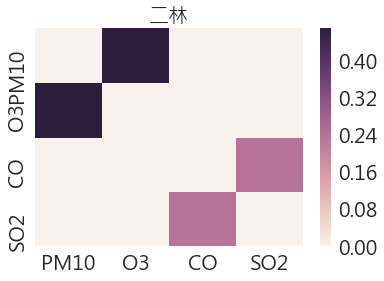

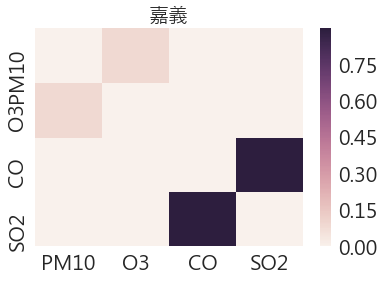

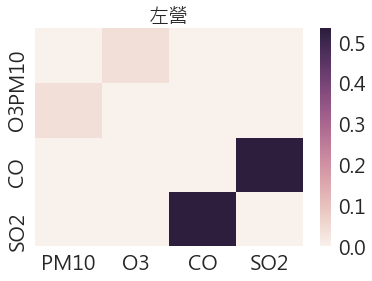

In [28]:
singleplace('淡水')
singleplace('新竹')
singleplace('南投')
singleplace('二林')
singleplace('嘉義')
singleplace('左營')

## 洞察
* ## 從'嘉義' 的4個汙染物交互比較
* ## SO2SubIndex & COSubIndex 交叉的顏色較深，所以關聯性較低(因為pvalue較高)

## 將地理位置較近的地區稍做分類

*  '馬公', '金門', '馬祖'
*   '恆春', '潮州', '屏東', '小港', '前鎮', '前金','左營', '楠梓', '林園', '大寮', '鳳山', '仁武', '橋頭', '美濃',
*   '臺南', '安南', '善化','新營', '嘉義', '臺西', '朴子', '新港', '崙背', '斗六',
*   '大同', '松山', '古亭', '萬華', '中山', '士林',   '淡水', '林口', '菜寮', '新莊', '板橋', '土城', '新店', '萬里', '汐止', '基隆'
*   '南投', '二林', '線西', '彰化','西屯', '忠明', '大里', '沙鹿', '豐原', '三義', '苗栗'

*  '頭份', '新竹', '竹東', '湖口','龍潭', '平鎮', '觀音', '大園', 


### 目標：
### 抓取分散在離島、本島的各個地點分析其PM10的關聯性


In [25]:
places = [ '金門', '馬祖', '淡水',  '士林','基隆' , '苗栗', '二林' ,'新竹','龍潭' ]

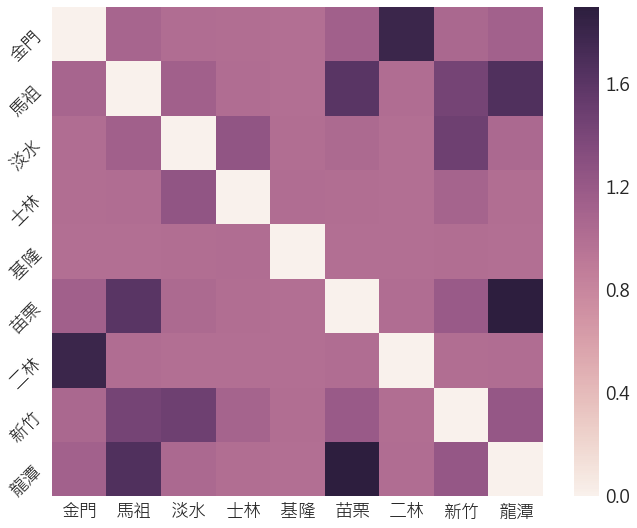

In [26]:
import seaborn as sns
matplotlib.rc('xtick', labelsize=18)
matplotlib.rc('ytick', labelsize=18)
matplotlib.rcParams['font.sans-serif'] = 'Microsoft JhengHei'

cor = np.zeros([9,9])

for i in range(9):
    for j in range(9):
        if (i!=j):
            val = ttest_ind(NOnull_data[NOnull_data['SiteName']==places[i]][pollutions[0]],NOnull_data[NOnull_data['SiteName']==places[j]][pollutions[0]])
            cor[i,j] = 2**(val.pvalue)
            #print(place[i],'&',place[j],' : ',  val.pvalue)
            #print()

fig, ax =  plt.subplots(figsize=(11, 9))



#ax = sns.heatmap(cor, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax = sns.heatmap(cor)
places.reverse()
ax.set_yticklabels(places,rotation=45) # set the labels
places.reverse()
ax.set_xticklabels(places)



## 結果

* ## 以上地點為抓取分散在離島、本島的各個地點
* ## 顏色愈深代表兩地區空氣汙染物(PM10)指數的關聯性愈低
* ## 顏色較深關聯性較低(因為pvalue較高)

# ANOVA

In [14]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
df = NOnull_data[NOnull_data['SiteName']==places[0]]

In [30]:
df

,SiteId,SiteName,MonitorDate,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,NO2SubIndex
3,77,金門,2017-04-08,24,3.0,2.0,24.0,23.0,NaN
79,77,金門,2017-04-07,43,8.0,4.0,27.0,43.0,NaN
155,77,金門,2017-04-06,58,8.0,4.0,30.0,58.0,NaN
231,77,金門,2017-04-05,73,8.0,7.0,55.0,73.0,NaN
307,77,金門,2017-04-04,70,10.0,5.0,66.0,70.0,NaN
383,77,金門,2017-04-03,66,8.0,4.0,61.0,66.0,NaN
459,77,金門,2017-04-02,74,9.0,5.0,64.0,74.0,NaN
535,77,金門,2017-04-01,66,5.0,5.0,66.0,60.0,NaN
611,77,金門,2017-03-31,56,7.0,5.0,39.0,56.0,NaN
687,77,金門,2017-03-30,78,12.0,6.0,62.0,78.0,NaN


## 目標：
## 嘗試ANOVA的方法，分析在金門地區4個汙染物中哪一個對PSI影響最大


In [39]:

mod = ols('PSI  ~ PM10SubIndex + O3SubIndex + COSubIndex + SO2SubIndex ',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                  sum_sq   df           F    PR(>F)
PM10SubIndex  193.649042  1.0  115.096854  0.000002
O3SubIndex      5.711137  1.0    3.394460  0.098534
COSubIndex      1.921824  1.0    1.142251  0.313003
SO2SubIndex     2.231191  1.0    1.326126  0.279168
Residual       15.142389  9.0         NaN       NaN


## 結果：在金門地區，PM10對PSI的影響最大，而其他空氣分子對PSI影響甚小

# *

## 目標：
## 嘗試ANOVA的方法，分析在嘉義二林地區4個汙染物中哪一個對PSI影響最大

In [44]:
df1 = NOnull_data[NOnull_data['SiteName']==places[6]]

In [45]:
mod = ols('PSI  ~ PM10SubIndex + O3SubIndex + COSubIndex + SO2SubIndex ',
                data=df1).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                 sum_sq   df          F    PR(>F)
PM10SubIndex  75.623724  1.0  12.525527  0.007629
O3SubIndex    90.573669  1.0  15.001681  0.004720
COSubIndex     0.443071  1.0   0.073386  0.793328
SO2SubIndex    7.080474  1.0   1.172736  0.310397
Residual      48.300544  8.0        NaN       NaN


## 結果：在嘉義二林地區，O3對PSI的影響最大，而第二個對PSI影響比較大的是O3